# 📊 Project 7: A Machine Learning Journey
**Author:** Sabriya Sowers
🔗 [GitHub Repository](https://github.com/ssowers2/datafun-07-applied)

### Import Python Libraries needed for project

In [95]:
import sys
import os
import IPython
from IPython.display import display
import numpy as np
import pandas as pd
import pyarrow as pa
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from scipy import stats

print("Imports loaded successfully!")

Imports loaded successfully!


## Part 1: Chart a Straight Line

### Fahrenheit to Celsius Conversion
This section creates a dataset of Fahrenheit values and converts them to Celsius.

In [96]:
# Define the lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Create a list of tuples (Fahrenheit, Celsius)
temps = [(f, c(f)) for f in range (0, 101, 10)]

print(temps)

[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


### Plotting Fahrenheit vs. Celsius
A line graph is plotted to visualize the temperature conversion from Fahrenheit to Celsius.

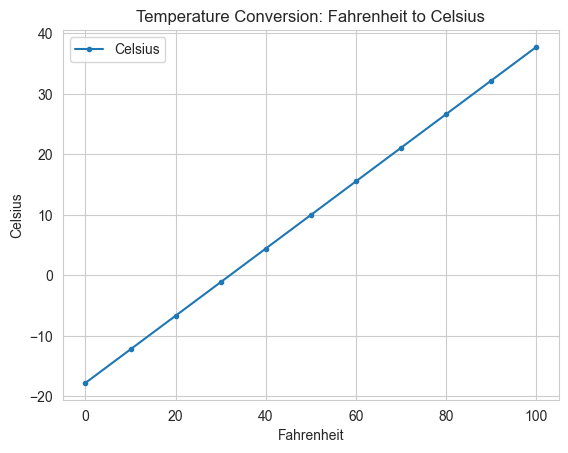

In [101]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Graph Title ";" removes text above chart
axes.set_title("Temperature Conversion: Fahrenheit to Celsius");  

### Loading and Processing NYC January High Temperatures
This section loads historical NYC January temperature data and prepares it for analysis.

In [108]:
# Loads dataset
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

# Display the first 3 rows of the dataset to check the structure and column names
display(nyc_df.head(3))  

# Display the last 3 rows to verify data consistency and completeness
display(nyc_df.tail(3))

# Renaming columns for better readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Check the data type of the 'Date' column to ensure it's numeric
nyc_df.Date.dtype

#Convert YYYYMM to YYYY (truncate last two digits)
nyc_df.Date = nyc_df.Date.floordiv(100)

#
display(nyc_df.head(3))

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


,Date,Value,Anomaly
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Summary Statistics of NYC Temperature Data
Basic statistics for January high temperatures in NYC.

In [109]:
#Calculating basic descriptive stats for the dataset
pd.set_option('display.precision', 2)

# Display temperature stats
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Part 2 - Prediction

### Forecasting Future January High Temperatures
Using linear regression, we estimate NYC’s January average high temperatures for future years.


In [110]:
# forecasting future January average high temperatures
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
# display(linear_regression.slope)
# display(linear_regression.intercept)

# Predict the average high temp for 2024
forecast_2024 = linear_regression.slope * 2024 + linear_regression.intercept

### Extending the Regression Line Beyond 2024
Generate an extended dataset to predict trends up to 2040.

In [126]:
# Generate an extended range of years
# Extends past 2024 for clarity
extended_years = np.arange(nyc_df.Date.min(), 2040)  

# Predicted line
predicted_temps = linear_regression.slope * extended_years + linear_regression.intercept  

### Creating the Regression Plot
A scatterplot with a fitted trend line shows past temperatures, while a dashed line extends predictions.


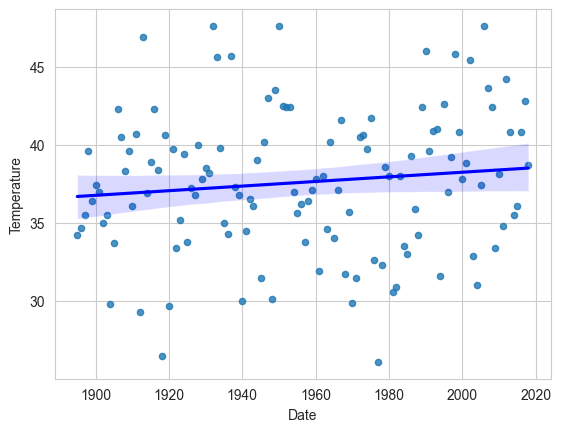

In [119]:
# Set Seaborn style
sns.set_style('whitegrid')

# Create the regression plot
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"s": 20}, line_kws={"color": "blue"}, label="Actual Data")

### Visualizing Predictions with Trend Lines
- This section generates a scatter plot of historical NYC January high temperatures along with a regression line.  
- The trend line is manually extended beyond 2018 to forecast future temperatures up to 2040.  
- A red dot highlights the predicted temperature for 2024.  
- Seaborn's `regplot()` is used for initial visualization, while Matplotlib is used to extend the trend line and emphasize predictions.
- Adjusted the X-axis, Y-axis, title, and legend for clarity.


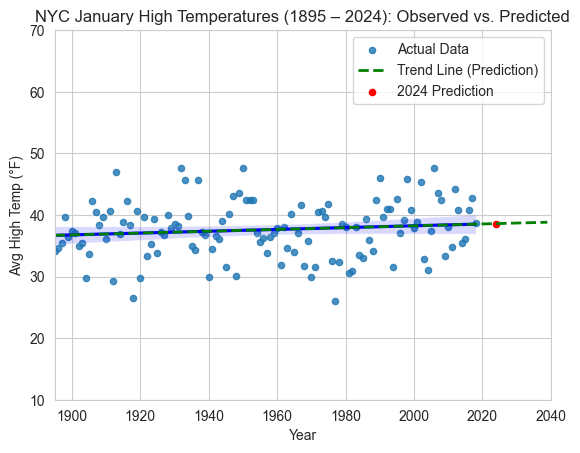

In [125]:
# Set Seaborn style
sns.set_style('whitegrid')

# Create the regression plot
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"s": 20}, line_kws={"color": "blue"}, label="Actual Data")

# Plot the regression line manually so it extends to 2024
plt.plot(extended_years, predicted_temps, color='green', linestyle='--', linewidth=2, label="Trend Line (Prediction)")

# Plot the predicted temperature for 2024 as a red dot so it stands out
plt.scatter(2024, forecast_2024, color='red', marker='o', s=20, label='2024 Prediction')

# # Set X and Y limits
plt.xlim(nyc_df.Date.min(), 2040) # Extends past 2024 for clarity
plt.ylim(10, 70)

# Add Title & Labels
plt.title('NYC January High Temperatures (1895 – 2024): Observed vs. Predicted')  
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")

# Show legend
plt.legend();

## Part 3 - Prediction

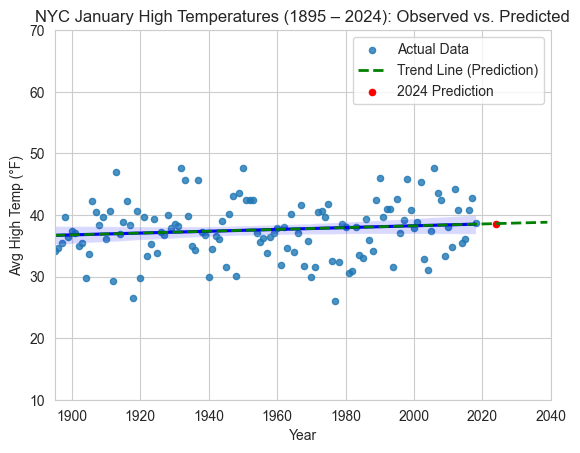

In [127]:
# forecasting future January average high temperatures
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
# display(linear_regression.slope)
# display(linear_regression.intercept)

# Predict the average high temp for 2024
forecast_2024 = linear_regression.slope * 2024 + linear_regression.intercept

# Generate an extended range of years (from dataset start to 2024)
extended_years = np.arange(nyc_df.Date.min(), 2040)  # Extends past 2024 for clarity
predicted_temps = linear_regression.slope * extended_years + linear_regression.intercept  # Predicted line

# Set Seaborn style
sns.set_style('whitegrid')

# Create the regression plot
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"s": 20}, line_kws={"color": "blue"}, label="Actual Data")

# Plot the regression line manually so it extends to 2024
plt.plot(extended_years, predicted_temps, color='green', linestyle='--', linewidth=2, label="Trend Line (Prediction)")

# Plot the predicted temperature for 2024 as a red dot so it stands out
plt.scatter(2024, forecast_2024, color='red', marker='o', s=20, label='2024 Prediction')

# # Set X and Y limits
plt.xlim(nyc_df.Date.min(), 2040) # Extends past 2024 for clarity
plt.ylim(10, 70)

# Add Title & Labels
plt.title('NYC January High Temperatures (1895 – 2024): Observed vs. Predicted')  
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")

# Show legend
plt.legend();